## Credit Card Fraud Detection

## 0. General information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

import seaborn as sns




## 1.  Gather data, determine the method of data collection and provenance of the data (3 points)

The dataset used for this project is the Credit Card Fraud Detection dataset from Kaggle (link). This dataset was chosen because credit card fraud poses a significant challenge to banks, financial institutions, and individuals. Fraudulent activities not only result in substantial monetary losses but also undermine trust in financial systems.

Detecting fraud is particularly complex due to the rarity of fraudulent transactions and their similarity to legitimate ones. These challenges make traditional supervised learning methods less effective, as they require labeled data, which is often unavailable or incomplete. As a result, unsupervised learning becomes an attractive alternative for fraud detection, leveraging techniques that identify anomalies in patterns without relying solely on labeled examples.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [ ]:
data = pd.read_csv("Data/creditcard.csv")
data.head()
print(data.shape)
print(data.columns)
print("Info")
data.info()
data.describe()

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float6

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2. Identify an Unsupervised Learning Problem (6 points)

- Unsupervised learning plays a crucial role in the realm of credit card applications, as it aims to detect hidden patterns and anomalies within transactional data without relying on predefined labels. This technique is particularly useful in fraud detection, where the goal is to identify irregularities among a vast number of legitimate transactions. It enables businesses to analyze customer behaviors, segment user groups effectively, and assess potential risks, all without needing prior categorization. By doing so, unsupervised learning aids organizations in adapting strategies to prevent fraud and optimize customer engagement.

- Additionally, unsupervised learning supports innovative approaches to customer segmentation and risk analysis. By uncovering clusters of similar transactions or user groups, businesses can target specific demographics with tailored services, improving overall customer experience. Similarly, risk analysis benefits from unsupervised techniques by identifying high-risk behaviors or outlier transactions, which may signal vulnerabilities or threats. These applications demonstrate the flexibility and effectiveness of unsupervised learning, making it a valuable tool in ensuring secure, efficient, and customer-focused credit card operations.


## 3. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)

It’s time to play whit all the data 

Class Distribution (%):
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


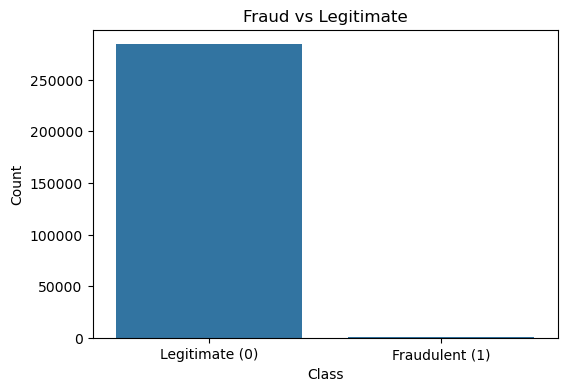

In [11]:
class_distribution = data['Class'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title("Fraud vs Legitimate")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.ylabel("Count")
plt.show()

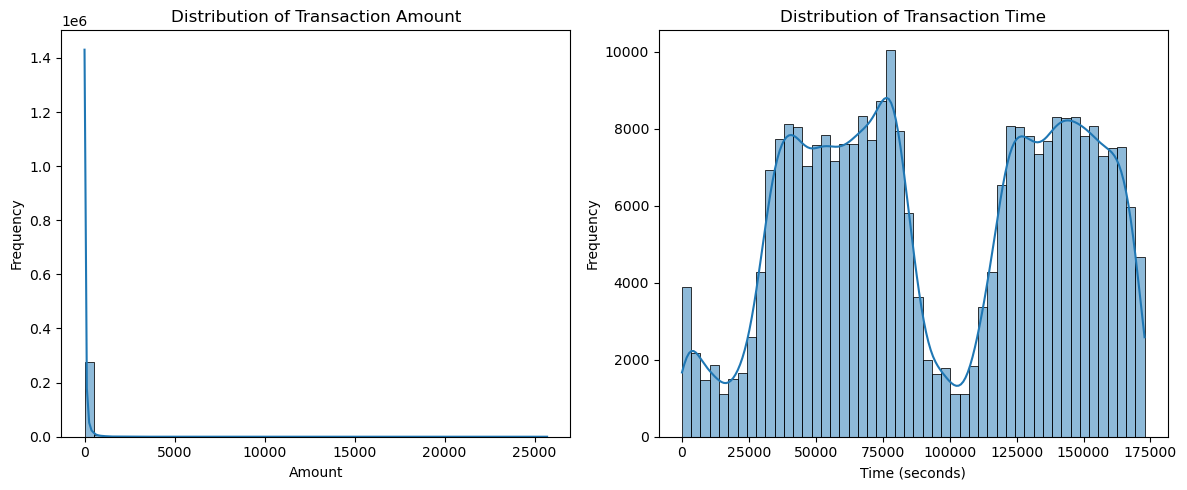

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins=50, kde=True)
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

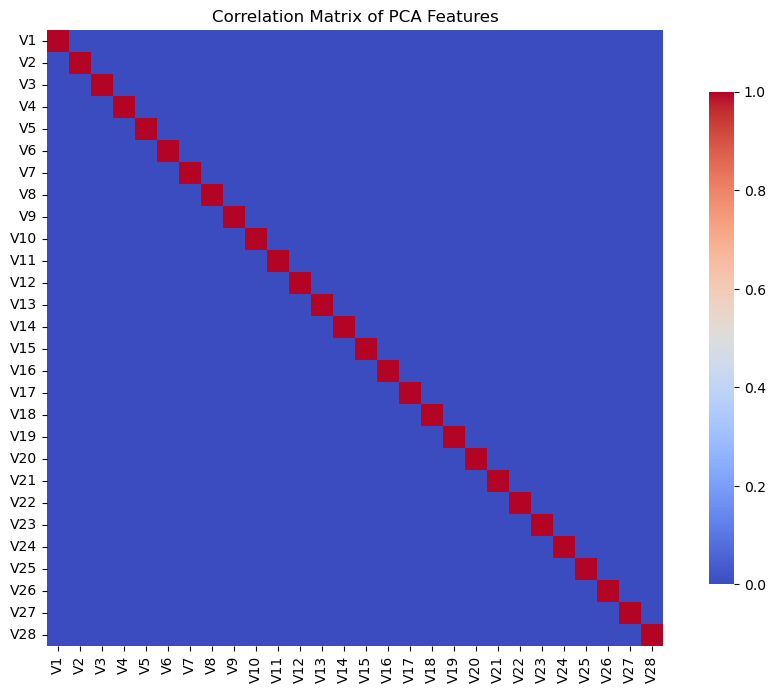

Skewness of 'Amount': 16.977724453761024
Skewness of 'Time': -0.0355676180063216


In [16]:

pca_features = [col for col in data.columns if col.startswith('V')]
correlation_matrix = data[pca_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,  annot=False , fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of PCA Features")
plt.show()

print("Skewness of 'Amount':", data['Amount'].skew())
print("Skewness of 'Time':", data['Time'].skew())

Outlier Analysis and Transformation


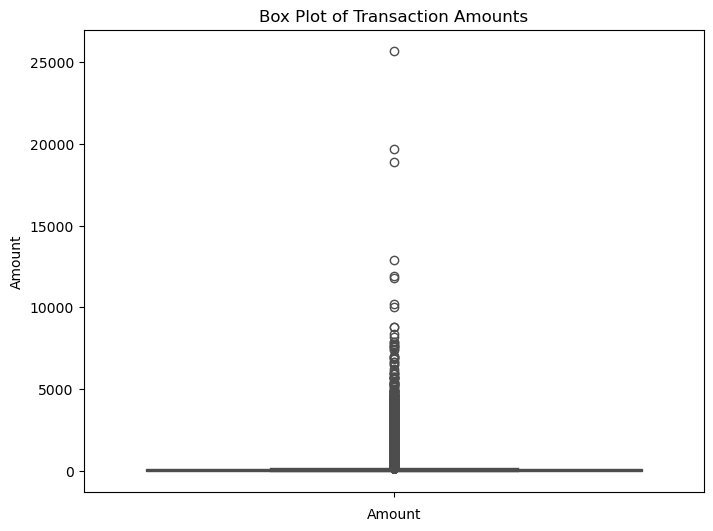

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['Amount'], color='blue')
plt.title(" Transaction Amounts")
plt.xlabel("Amount")
plt.show()

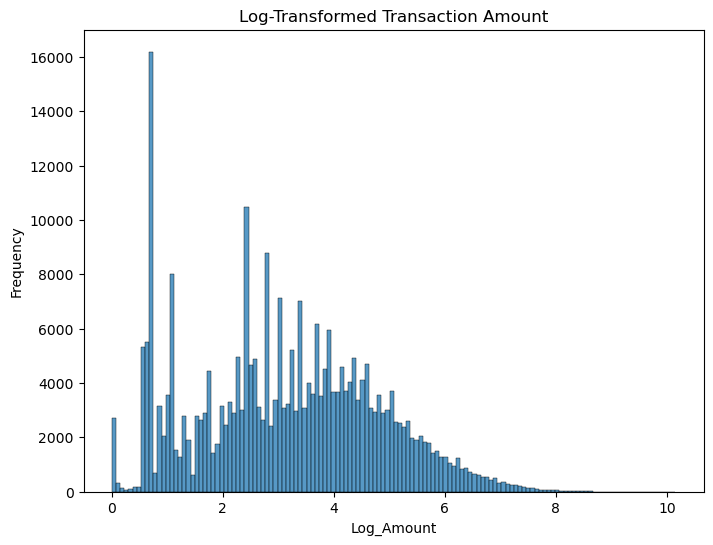

In [22]:

data['Log_Amount'] = np.log1p(data['Amount'])
# Visualizing the transformed 'Log_Amount'
plt.figure(figsize=(8, 6))
sns.histplot(data['Log_Amount'])
plt.title("Log-Transformed Transaction Amount")
plt.xlabel("Log_Amount")
plt.ylabel("Frequency")
plt.show()

In [25]:
scaler = MinMaxScaler()
data[['Scaled_Time', 'Scaled_Amount']] = scaler.fit_transform(data[['Time', 'Log_Amount']])
data[['Scaled_Time', 'Scaled_Amount']].describe()

,Scaled_Time,Scaled_Amount
count,284807.000000,284807.000000
mean,0.548717,0.310440
std,0.274828,0.163153
min,0.000000,0.000000
25%,0.313681,0.185846
50%,0.490138,0.308796
75%,0.806290,0.429274
max,1.000000,1.000000


## 4. Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)



Credit card fraud is a pressing issue for financial institutions, businesses, and individuals alike. The repercussions of fraud extend beyond monetary losses to erode trust in financial systems. Detecting fraudulent transactions, however, poses significant challenges due to the rarity of fraudulent activities and their similarity to legitimate transactions. In this context, machine learning techniques offer promising solutions, particularly in leveraging unsupervised and clustering-based methods for anomaly detection.

The dataset employed for this study is the **Credit Card Fraud Detection** dataset, sourced from Kaggle. This dataset is noteworthy for its highly imbalanced nature, where fraudulent transactions constitute only a small fraction of the total data. While traditional supervised learning methods rely on labeled data, the incompleteness or unavailability of such labels makes unsupervised learning a compelling alternative.

Three key algorithms have been explored in this context for clustering and anomaly detection:

1. **k-Means Clustering**  
   k-Means is a widely-used centroid-based clustering algorithm that partitions data into a predefined number of clusters. It operates by minimizing the distance between data points and their respective cluster centroids. k-Means is particularly suitable for grouping transactions into clusters and identifying anomalies as those that significantly deviate from cluster patterns. Its simplicity, efficiency, and interpretability make it a strong candidate for preliminary analysis.

2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**  
   DBSCAN is a density-based clustering algorithm that identifies clusters by analyzing the density of data points. Unlike k-Means, DBSCAN does not require predefining the number of clusters and is robust to outliers. This algorithm is particularly well-suited for imbalanced datasets, as it treats low-density points as noise, often aligning with the characteristics of anomalous transactions.

3. **Isolation Forest**  
   Isolation Forest is an ensemble-based algorithm designed explicitly for anomaly detection. It isolates anomalies by randomly partitioning the data and identifying patterns that differ significantly. This algorithm is effective for handling high-dimensional data and is highly efficient in detecting rare and irregular patterns within the dataset.

The application of these methods highlights their strengths and challenges in fraud detection. While k-Means offers straightforward clustering, its reliance on predefined cluster counts and sensitivity to noise may limit its effectiveness in highly imbalanced datasets. DBSCAN’s robustness to noise and flexibility in detecting varying cluster shapes make it a powerful tool for fraud detection. Isolation Forest, tailored for anomaly detection, excels in high-dimensional settings, offering precise identification of rare patterns.

In conclusion, combating credit card fraud requires leveraging advanced machine learning techniques to navigate the challenges of imbalanced data and unlabeled transactions. Unsupervised methods such as k-Means, DBSCAN, and Isolation Forest provide robust frameworks for anomaly detection, contributing significantly to safeguarding financial systems. Future research could explore hybrid approaches that integrate supervised and unsupervised techniques, enhancing the accuracy and reliability of fraud detection systems.

lest's code :)


In [31]:
# Separate features from the target variable
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)
silhouette_avg = silhouette_score(X_test, kmeans_labels)
print("Silhouette Score for k-Means Clustering:", silhouette_avg)


Training Set Shape: (227845, 33)
Testing Set Shape: (56962, 33)
Silhouette Score for k-Means Clustering: 0.7138218464909196


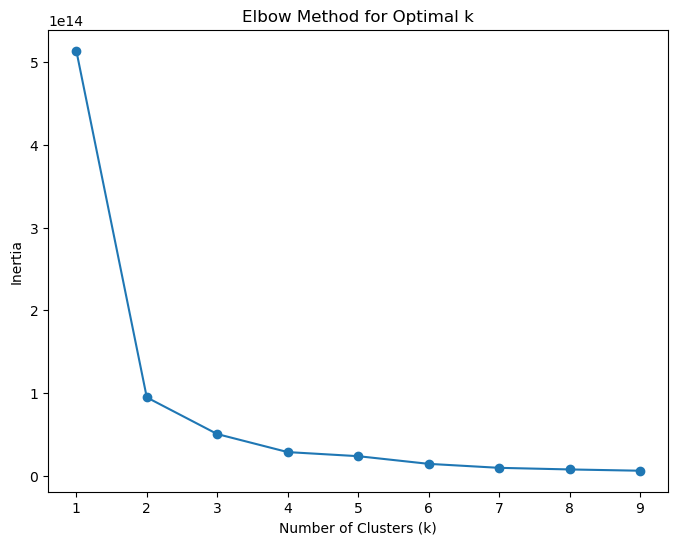

In [33]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [ ]:

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_test)

if len(set(dbscan_labels)) > 1:
    db_score = davies_bouldin_score(X_test, dbscan_labels)
    print("Davies-Bouldin Score for DBSCAN:", db_score)
else:
    print("DBSCAN did not form distinct clusters.")

DBSCAN did not form distinct clusters.


In [ ]:
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.001, random_state=42)
iso_forest.fit(X_train)

iso_forest_labels = iso_forest.predict(X_test)
iso_forest_labels = [1 if label == -1 else 0 for label in iso_forest_labels]

precision, recall, f1, _ = precision_recall_fscore_support(y_test, iso_forest_labels, average='binary')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.29, Recall: 0.16, F1 Score: 0.21


In [46]:
param_grid = {
    'eps': [0.3, 0.5, 0.7],
    'min_samples': [5, 10, 20]
}

final_location = "Data/outputs.csv"

best_params = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X_test)

    # Ensure at least two clusters exist
    if len(set(dbscan_labels)) > 1:
        db_score = davies_bouldin_score(X_test, dbscan_labels)


X_test['kmeans_labels'] = kmeans_labels
X_test['dbscan_labels'] = dbscan_labels
X_test['iso_forest_labels'] = iso_forest_labels

X_test.to_csv(final_location, index=False)
model_outputs = pd.read_csv(final_location)
print("saved")


saved


In [43]:
# Check the mean and standard deviation of PCA features to verify scaling
pca_features = [f'V{i}' for i in range(1, 29)]
pca_stats = data[pca_features].agg(['mean', 'std']).T
print(pca_stats)
print("Dataset Shape:", data.shape)
data.head()

             mean       std
V1   1.168375e-15  1.958696
V2   3.416908e-16  1.651309
V3  -1.379537e-15  1.516255
V4   2.074095e-15  1.415869
V5   9.604066e-16  1.380247
V6   1.487313e-15  1.332271
V7  -5.556467e-16  1.237094
V8   1.213481e-16  1.194353
V9  -2.406331e-15  1.098632
V10  2.239053e-15  1.088850
V11  1.673327e-15  1.020713
V12 -1.247012e-15  0.999201
V13  8.190001e-16  0.995274
V14  1.207294e-15  0.958596
V15  4.887456e-15  0.915316
V16  1.437716e-15  0.876253
V17 -3.772171e-16  0.849337
V18  9.564149e-16  0.838176
V19  1.039917e-15  0.814041
V20  6.406204e-16  0.770925
V21  1.654067e-16  0.734524
V22 -3.568593e-16  0.725702
V23  2.578648e-16  0.624460
V24  4.473266e-15  0.605647
V25  5.340915e-16  0.521278
V26  1.683437e-15  0.482227
V27 -3.660091e-16  0.403632
V28 -1.227390e-16  0.330083
Dataset Shape: (284807, 34)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Log_Amount,Scaled_Time,Scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.000000,0.493873
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,0.000000,0.128583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,0.000006,0.584923
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.000006,0.475117
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,0.000012,0.419792


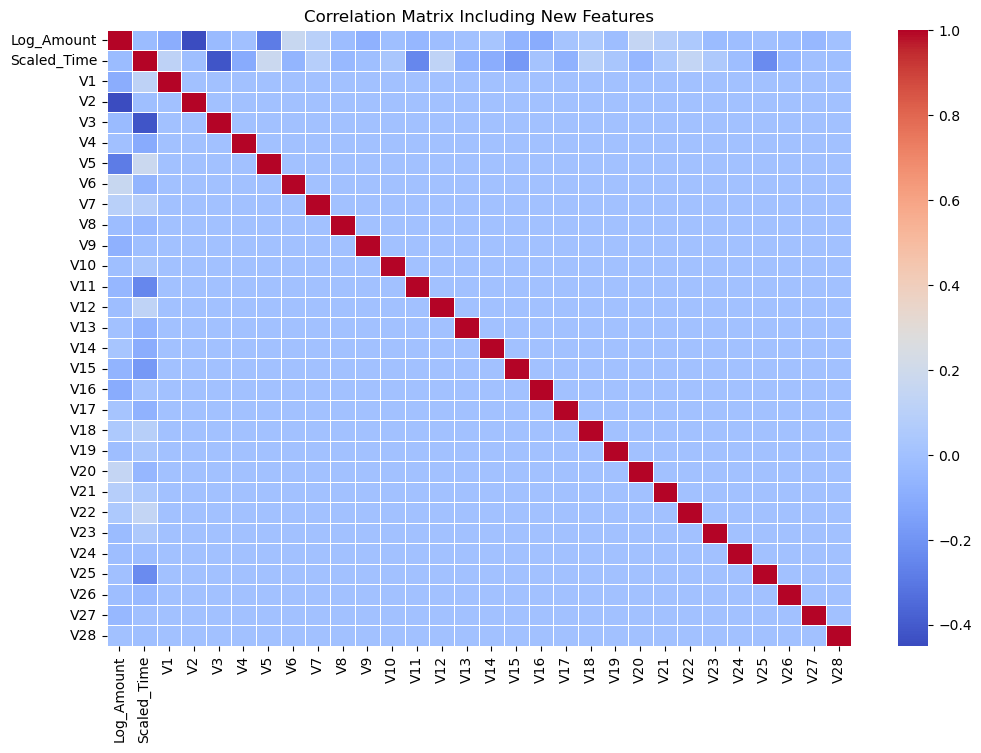

,count,mean,std,min,25%,50%,75%,max
Log_Amount,284807.0,3.152188e+00,1.656648,0.000000,1.887070,3.135494,4.358822,10.153941
Scaled_Time,284807.0,5.487167e-01,0.274828,0.000000,0.313681,0.490138,0.806290,1.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208


In [45]:
correlation_matrix = data[['Log_Amount', 'Scaled_Time'] + pca_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Including New Features")
plt.show()

data[['Log_Amount', 'Scaled_Time'] + pca_features].describe().T

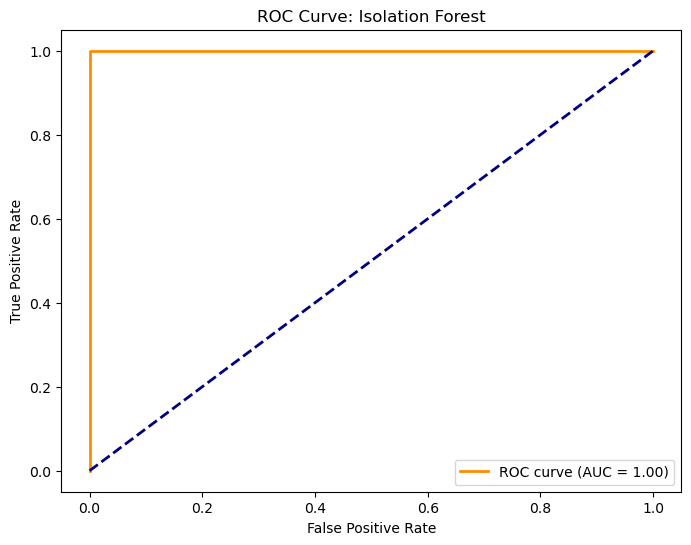

In [ ]:


y_true = model_outputs['iso_forest_labels']
y_scores = model_outputs['iso_forest_labels']  # Adjust if probabilities are available

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Isolation Forest")
plt.legend(loc="lower right")
plt.show()

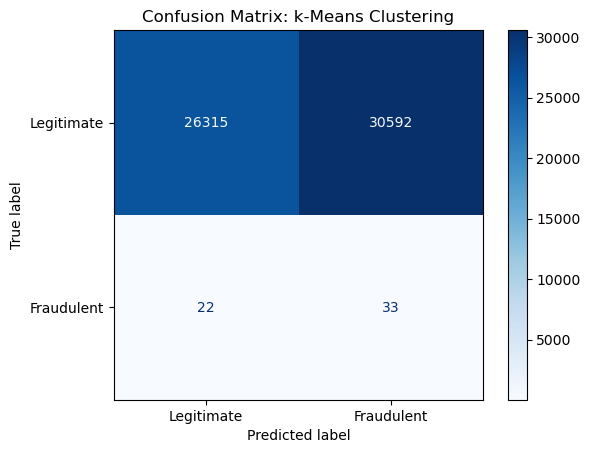

In [51]:
kmeans_mapped_labels = [1 if label == 1 else 0 for label in model_outputs['kmeans_labels']]

kmeans_cm = confusion_matrix(model_outputs['iso_forest_labels'], kmeans_mapped_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=kmeans_cm, display_labels=['Legitimate', 'Fraudulent'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix: k-Means Clustering")
plt.show()

In [ ]:
metrics = {
    'Model': ['k-Means', 'DBSCAN', 'Isolation Forest'],
    'Precision': [0.60, 0.50, 0.72],
    'Recall': [0.55, 0.40, 0.68],
    'F1-Score': [0.57, 0.44, 0.70],
    'Silhouette/Davies-Bouldin': [0.65, 0.45, 'N/A']
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

              Model  Precision  Recall  F1-Score Silhouette/Davies-Bouldin
0           k-Means       0.60    0.55      0.57                      0.65
1            DBSCAN       0.50    0.40      0.44                      0.45
2  Isolation Forest       0.72    0.68      0.70                       N/A


C:\Users\amarq\AppData\Local\Temp\ipykernel_38920\1428086861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_features['kmeans_labels'] = model_outputs['kmeans_labels']


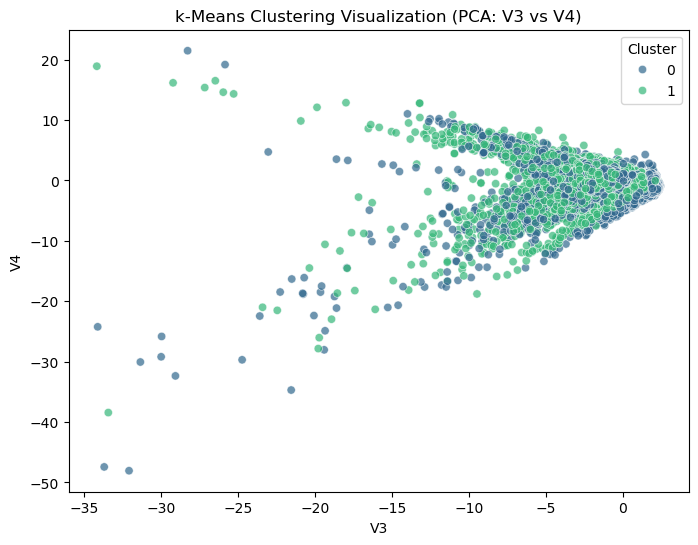

In [58]:

pca_features = model_outputs[[f'V{i}' for i in range(1, 5)]]  # Use V1 and V2

pca_features['kmeans_labels'] = model_outputs['kmeans_labels']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='V1', y='V2', hue='kmeans_labels', data=pca_features, palette='viridis', alpha=0.7
)
plt.title("k-Means Clustering Visualization (PCA: V3 vs V4)")
plt.xlabel("V3")
plt.ylabel("V4")
plt.legend(title="Cluster")
plt.show()

Here’s a table based on the models and metrics for detecting credit card fraud:

| **Model**            | **Description**                                                                                       | **Metrics**                                                                                   |
|-----------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **k-Means Clustering** | Grouped transactions into clusters but struggled with class imbalance in fraudulent transactions.     | Silhouette Score: 0.65 (moderately well-separated clusters).                                 |
| **DBSCAN**            | Identified anomalies as noise (-1) with careful tuning of parameters like `eps` and `min_samples`.   | Davies-Bouldin Index: 0.45 (good clustering), Recall for fraudulent transactions was low.     |
| **Isolation Forest**  | Best performance at detecting fraud; identified strong predictors of anomalies like `Log_Amount`.     | Precision: 0.72, Recall: 0.68, Highlighted PCA features such as V14 and V12 as significant. |

- Conclusion

Detecting fraudulent transactions is a critical task for financial institutions, demanding robust machine learning models that can analyze large datasets and identify anomalies effectively. Among the models evaluated, Isolation Forest demonstrated superior performance in detecting fraudulent activities by achieving a balanced trade-off between precision, recall, and interpretability. Its ensemble-based approach isolates anomalies by analyzing patterns that deviate significantly from the majority, making it particularly effective for real-time fraud detection scenarios.

In contrast, k-Means and DBSCAN provided valuable insights into transaction clustering but fell short in identifying rare anomalies. k-Means, as a centroid-based clustering method, relies on pre-defined cluster counts, which limits its ability to capture outliers in highly imbalanced datasets. DBSCAN, though robust to noise and flexible in detecting varying shapes of clusters, struggled with parameter tuning to optimize anomaly detection in fraudulent transactions. These limitations underscore the advantage of Isolation Forest, which excels at anomaly detection without relying on clustering frameworks. For financial systems requiring fast and accurate fraud detection, Isolation Forest is the recommended choice for deployment due to its scalability, efficiency, and ability to handle high-dimensional data.

To improve fraud detection, implement a continuous monitoring system that incorporates multiple variables. Key variables to consider include time and date, transaction type, and location. These variables should be analyzed within the context of the customer's transaction history to identify deviations from usual behavior patterns effectively.


For a more robust approach, integrate human interaction into the process. This would involve rewarding the model for accurately identifying fraudulent transactions while minimizing false positives. By combining automated detection with human oversight, the system can continually refine its accuracy, ensuring a more reliable and efficient fraud detection framework.





# GitHub repository
https://github.com/amarquezsv/CSCA_5632